# Dimensionality Reduction Assignment.

In [132]:
import mglearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Import data.

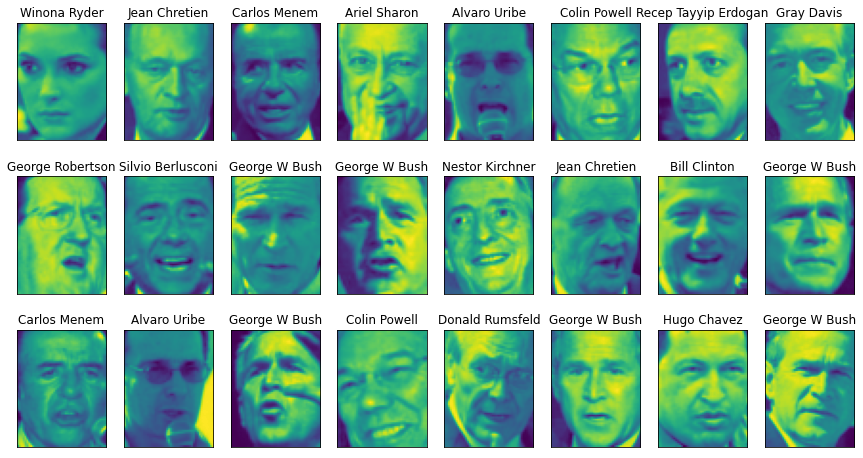

In [155]:
from sklearn.datasets import fetch_lfw_people

people=fetch_lfw_people(min_faces_per_person=20,resize=0.5)

fig,axes=plt.subplots(3,8,figsize=(15,8),
                     subplot_kw={'xticks':(),'yticks':()})
for target, image, ax in zip(people.target,people.images,axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [156]:
people.images.shape

(3023, 62, 47)

In [157]:
people.target.shape

(3023,)

In [158]:
people.data.shape

(3023, 2914)

In [159]:
people.target_names

array(['Alejandro Toledo', 'Alvaro Uribe', 'Amelie Mauresmo',
       'Andre Agassi', 'Angelina Jolie', 'Ariel Sharon',
       'Arnold Schwarzenegger', 'Atal Bihari Vajpayee', 'Bill Clinton',
       'Carlos Menem', 'Colin Powell', 'David Beckham', 'Donald Rumsfeld',
       'George Robertson', 'George W Bush', 'Gerhard Schroeder',
       'Gloria Macapagal Arroyo', 'Gray Davis', 'Guillermo Coria',
       'Hamid Karzai', 'Hans Blix', 'Hugo Chavez', 'Igor Ivanov',
       'Jack Straw', 'Jacques Chirac', 'Jean Chretien',
       'Jennifer Aniston', 'Jennifer Capriati', 'Jennifer Lopez',
       'Jeremy Greenstock', 'Jiang Zemin', 'John Ashcroft',
       'John Negroponte', 'Jose Maria Aznar', 'Juan Carlos Ferrero',
       'Junichiro Koizumi', 'Kofi Annan', 'Laura Bush',
       'Lindsay Davenport', 'Lleyton Hewitt', 'Luiz Inacio Lula da Silva',
       'Mahmoud Abbas', 'Megawati Sukarnoputri', 'Michael Bloomberg',
       'Naomi Watts', 'Nestor Kirchner', 'Paul Bremer', 'Pete Sampras',
       'Rece

In [160]:
len(people.target_names)

62

In [161]:

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [162]:
# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = people.images.shape

X = people.data
y = people.target

n_features = X.shape[1]
target_names = people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Total dataset size:
n_samples: 3023
n_features: 2914
n_classes: 62


In [163]:
X.shape

(3023, 2914)

In [164]:
y.shape

(3023,)

## Scale the grayscale values to be between 0 and 1. 

In [172]:
X=X/255 # For a better numeric stability.

## Splitting into training and testing dataset.

In [173]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

In [174]:
X_train.shape

(2267, 2914)

In [175]:
y_train.shape

(2267,)

## Building a knn classifier and checking the accuracy.

In [182]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
print("Test set score: {:.3f}".format(knn.score(X_test,y_test)))

Test set score: 0.325


In [183]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
print("Test set score: {:.3f}".format(knn.score(X_test,y_test)))

Test set score: 0.282


In [184]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
print("Test set score: {:.3f}".format(knn.score(X_test,y_test)))

Test set score: 0.307


## Applying Principal Component Analysis (PCA) to the data.

* To rescale the principal components to have the same scale we use whitening option of PCA.
* It is the same as using StandardScalar after the transformation.

In [186]:
from sklearn.decomposition import PCA
pca=PCA(n_components=100,whiten=True,random_state=0).fit(X_train)
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(2267, 2914)
(756, 2914)


## Using PCA fitted data in knn classifier.

In [188]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca,y_train)
print("Test set score: {:.3f}".format(knn.score(X_test_pca,y_test)))

Test set score: 0.462


In [189]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_pca,y_train)
print("Test set score: {:.3f}".format(knn.score(X_test_pca,y_test)))

Test set score: 0.433


In [190]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_pca,y_train)
print("Test set score: {:.3f}".format(knn.score(X_test_pca,y_test)))

Test set score: 0.444


## Component vectors of first 18 principal components of the data.

In [193]:
pca.components_.shape

(100, 2914)

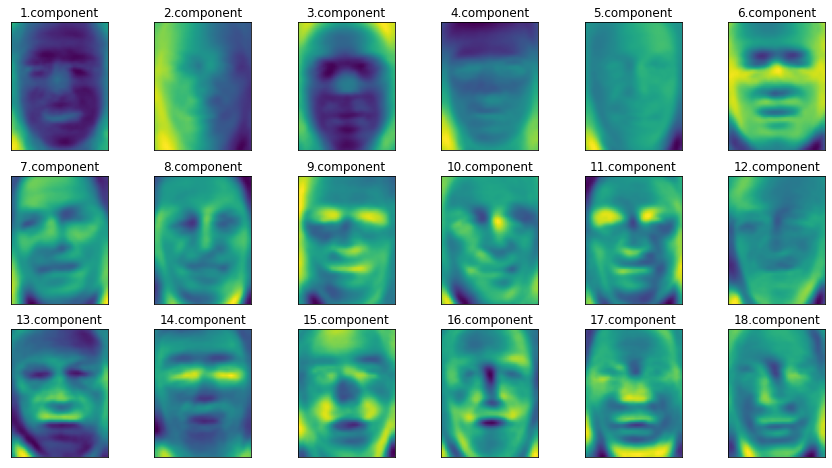

In [194]:
fig,axes=plt.subplots(3,6,figsize=(15,8),
                     subplot_kw={'xticks':(),'yticks':()})
for i, (component, ax) in enumerate(zip(pca.components_,axes.ravel())):
    ax.imshow(component.reshape(image_shape),cmap='viridis')
    ax.set_title('{}.component'.format((i+1)))

## Reconstructing the faces by increasing number of principal components.

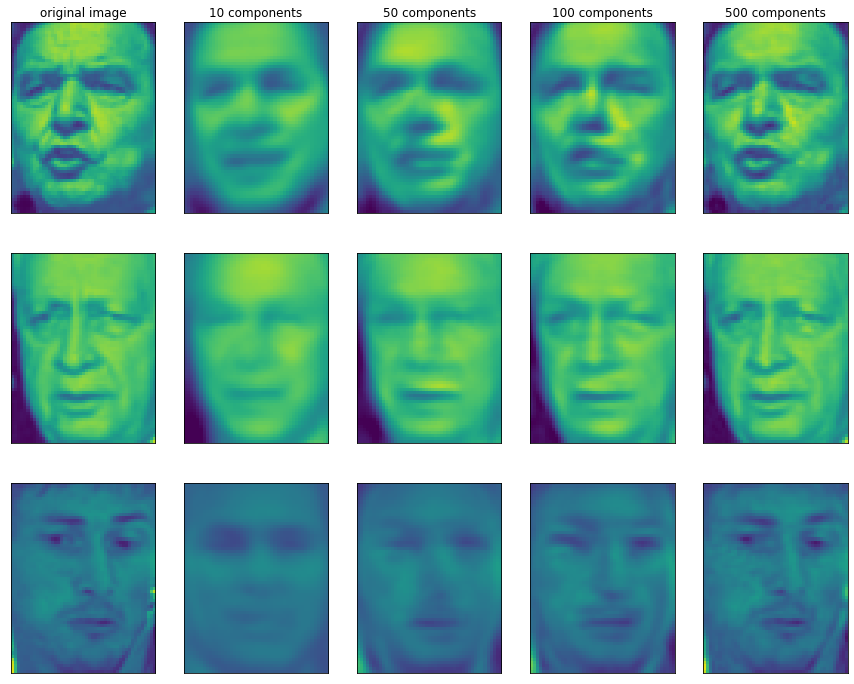

In [196]:
mglearn.plots.plot_pca_faces(X_train,X_test,image_shape);

## Visualizing all the faces in a scatter plot (Using only two principal components).

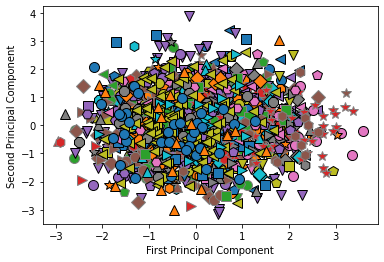

In [198]:
mglearn.discrete_scatter(X_train_pca[:,0],X_train_pca[:,1],y_train)
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component");

## Checking the execution time of diffrent PCA techniques.

In [199]:
import time

for n_components in (2, 50, 100):
    print("n_components =", n_components)
    regular_pca = PCA(n_components=n_components)
    inc_pca = IncrementalPCA(n_components=n_components, batch_size=500)
    rnd_pca = PCA(n_components=n_components, random_state=0, svd_solver="randomized")

    for pca in (regular_pca, inc_pca, rnd_pca):
        t1 = time.time()
        pca.fit(X_train)
        t2 = time.time()
        print("    {}: {:.1f} seconds".format(pca.__class__.__name__, t2 - t1))

n_components = 2
    PCA: 0.1 seconds
    IncrementalPCA: 2.1 seconds
    PCA: 0.1 seconds
n_components = 50
    PCA: 0.3 seconds
    IncrementalPCA: 2.7 seconds
    PCA: 0.2 seconds
n_components = 100
    PCA: 0.3 seconds
    IncrementalPCA: 2.8 seconds
    PCA: 0.3 seconds


## Using different kernel PCA.

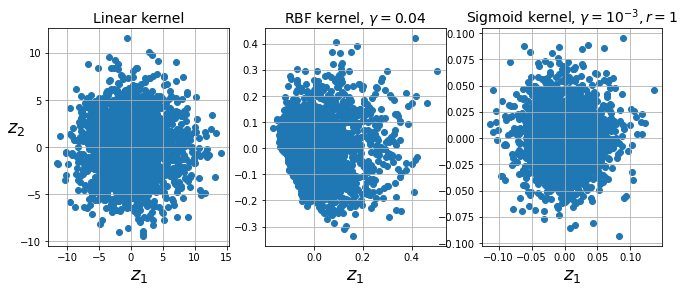

In [208]:
from sklearn.decomposition import KernelPCA

lin_pca = KernelPCA(n_components = 3, kernel="linear")
rbf_pca = KernelPCA(n_components = 3, kernel="rbf", gamma=0.04)
sig_pca = KernelPCA(n_components = 3, kernel="sigmoid", gamma=0.001, coef0=1)


plt.figure(figsize=(11, 4))
for subplot, pca, title in ((131, lin_pca, "Linear kernel"), (132, rbf_pca, "RBF kernel, $\gamma=0.04$"), (133, sig_pca, "Sigmoid kernel, $\gamma=10^{-3}, r=1$")):
    X_reduced = pca.fit_transform(X_train)
    if subplot == 132:
        X_reduced_rbf = X_reduced
    
    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)


plt.show()

## Finding best parameters.

In [210]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
        ("kpca", KernelPCA(n_components=2)),
        ("log_reg", LogisticRegression(solver="lbfgs"))
    ])

param_grid = [{
        "kpca__gamma": np.linspace(0.03, 0.05, 10),
        "kpca__kernel": ["rbf", "sigmoid"]
    }]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

{'kpca__gamma': 0.03222222222222222, 'kpca__kernel': 'rbf'}


## Using LLE to our dataset.

In [211]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=5, n_neighbors=10, random_state=0)
X_reduced = lle.fit_transform(X_train)

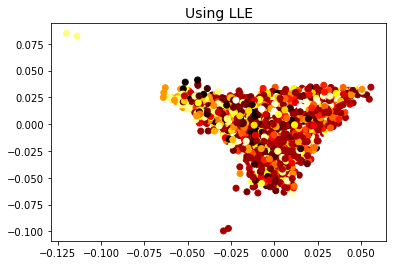

In [213]:
plt.title("Using LLE", fontsize=14)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1],c=y_train ,cmap=plt.cm.hot)
plt.show()

## Applying Multidimensional Scaling (MDS), Isomap and TSNE.

In [219]:
from sklearn.manifold import MDS
mds = MDS(n_components=3, random_state=0)
X_reduced_mds = mds.fit_transform(X_train)

from sklearn.manifold import Isomap
isomap = Isomap(n_components=3)
X_reduced_isomap = isomap.fit_transform(X_train)

from sklearn.manifold import TSNE
tsne = TSNE(n_components=3, random_state=0)
X_reduced_tsne = tsne.fit_transform(X_train)

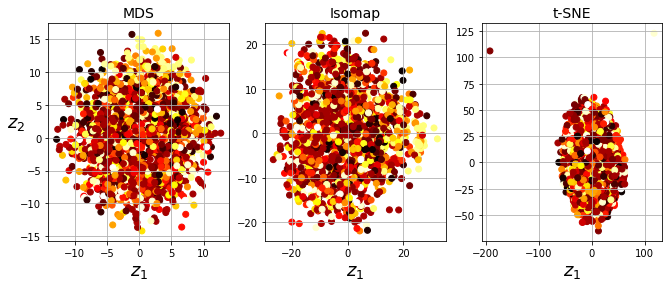

In [220]:
titles = ["MDS", "Isomap", "t-SNE"]

plt.figure(figsize=(11,4))

for subplot, title, X_reduced in zip((131, 132, 133), titles,
                                     (X_reduced_mds, X_reduced_isomap, X_reduced_tsne)):
    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_train, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)


plt.show()

## Using Random Forest Classifier.

In [221]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=0)

In [222]:
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [223]:
from sklearn.metrics import accuracy_score

y_pred = rnd_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.3862433862433862

In [224]:
X_train_reduced = pca.fit_transform(X_train)

In [225]:
rnd_clf2 = RandomForestClassifier(n_estimators=100, random_state=42)
rnd_clf2.fit(X_train_reduced, y_train)

RandomForestClassifier(random_state=42)

In [226]:
X_test_reduced = pca.transform(X_test)

y_pred = rnd_clf2.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

0.13624338624338625

## Confusion matrix

In [229]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)
# sns.heatmap(cm, annot=True)
# plt.xlabel('Predicted classes')
# plt.ylabel('Actual classes');

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [1 0 0 ... 0 0 0]]
